In [1]:
import pandas as pd

import torch
from torch import nn
from torch import Tensor
import math
import configparser
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch import cuda
import elastictransformer as st
import mrtm

c:\Users\trzci\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
dataset = st.CustomDataSet('dane_pogodowe.csv',window_length=720,prediction_window=30)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [3]:
target_dim_threshold = 0.15
target_dim_threshold_upper = 0.35

target_norm_threshold = 0.1
target_norm_threshold_upper = 2.0

losses = []
r_square = []
mean_prunabilities = []
mean_dims = []


dataset = st.CustomDataSet('dane_pogodowe.csv',window_length=720,prediction_window=30)
#keep this separate (in case it's needed)
flow_control_dataset = st.CustomDataSet('dane_pogodowe.csv',window_length=720,prediction_window=30)

params = st.ParameterProvider("series-weather.config")
t1 = st.ElasticTransformer(params)
device_id = torch.cuda.current_device()
t1.cuda(device_id)
train_dataset, test_dataset = dataset.getSets()
#_, loss_history = st.train_cuda(t1, train_dataset, device_id, epochs = 3, verbose_delay=-1)


epochs = 0
total_epochs = 200
increment = 5
vertical_control_delay = 25

losses = []
r_square = []
mean_prunabilities = []
mean_dims = []


head_limit = 16
stack_limit = 16

['averagePm10', 'averageAirTemp', 'averageRelativeHumidity', 'averageWindSpeed', 'rainAccumulation', 'day', 'month', 'year']
['averagePm10', 'averageAirTemp', 'averageRelativeHumidity', 'averageWindSpeed', 'rainAccumulation', 'day', 'month', 'year']


In [5]:
params = st.ParameterProvider("series-weather.config")
transformer = st.ElasticTransformer(params)
device_id = torch.cuda.current_device()
transformer.cuda(device_id)


network_controller = mrtm.MRTM(transformer)

In [6]:
network_controller.run(total_epochs=total_epochs,increment=increment,device_id=device_id,train_dataset=train_dataset,
                       vertical_control_delay=vertical_control_delay,flow_control_dataset=flow_control_dataset,target_dim_threshold=target_dim_threshold,
                       target_dim_threshold_upper=target_dim_threshold_upper,target_norm_threshold=target_norm_threshold,target_norm_threshold_upper=target_norm_threshold_upper,
                       head_limit=head_limit,stack_limit=stack_limit)

Epoch 0 of 5
Epoch loss: 0.4382215142250061
Epoch 1 of 5
Epoch loss: 0.15849174372851849
Epoch 2 of 5
Epoch loss: 0.08989022299647331
Epoch 3 of 5
Epoch loss: 0.06175328977406025
Epoch 4 of 5
Epoch loss: 0.05023935064673424
Epoch:  0  running loss:  0.05023935064673424
Scores assigned
hris (encoders)
0.30618621784789724
hris (decoders)
0.060993754559283325
adding a head
0.2041241452319315
heads:
encoders:
1
decoders:
2 , 1
Epoch 0 of 5
Epoch loss: 0.05935121653601527
Epoch 1 of 5
Epoch loss: 0.043706057127565145
Epoch 2 of 5
Epoch loss: 0.039926858618855476
Epoch 3 of 5
Epoch loss: 0.03781983652152121
Epoch 4 of 5
Epoch loss: 0.036481179064139724
Epoch:  1  running loss:  0.036481179064139724
Scores assigned
hris (encoders)
0.2282177322938192
hris (decoders)
0.2068398851654054
0.236227795630767
heads:
encoders:
1
decoders:
2 , 1
Epoch 0 of 5
Epoch loss: 0.04454529704526067
Epoch 1 of 5
Epoch loss: 0.03308050939813256
Epoch 2 of 5
Epoch loss: 0.03433685749769211
Epoch 3 of 5
Epoch loss:

In [7]:
network_controller.print_structure()

Structure
Encoder stack: 
9
1
2
16
16
16
12
10
2
Decoder stack: 
10   10
16   16
16   16
16   16
16   16
16   16
13   2
2   2
2   2


R^2 tensor(-0.2644)


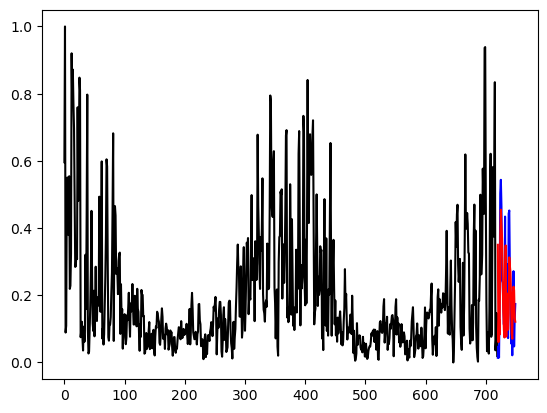

R^2 tensor(-3.3568)


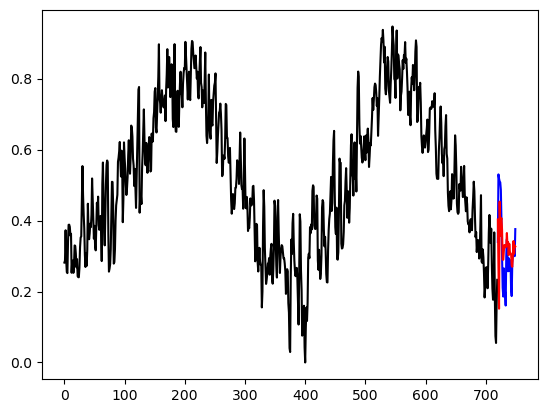

R^2 tensor(-1.8242)


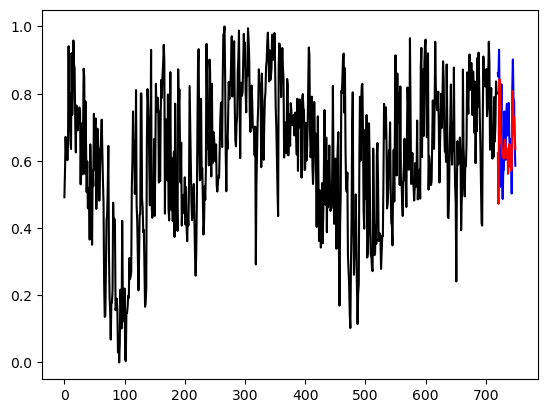

R^2 tensor(-0.6870)


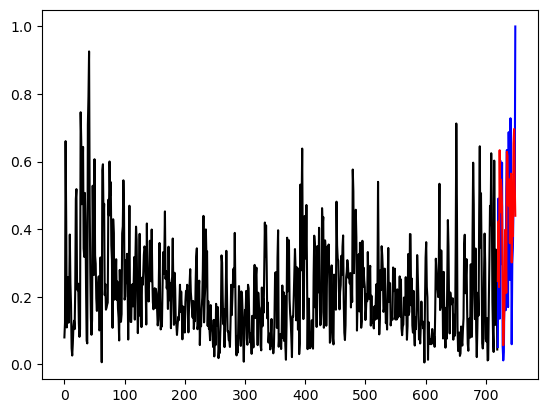

R^2 tensor(-1.0024)


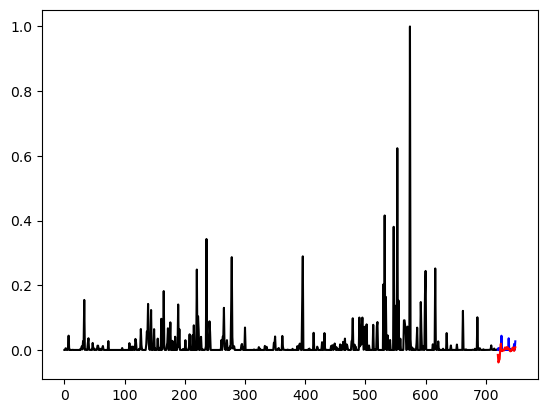

R^2 tensor(-122.6032)


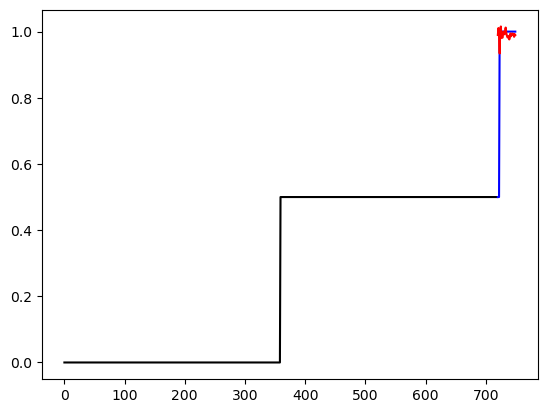

R^2 tensor(-19.8700)


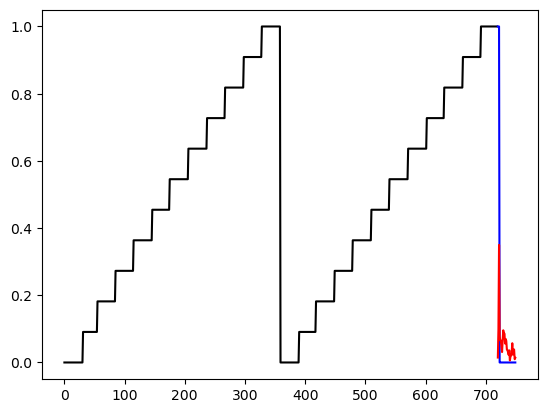

R^2 tensor(0.6865)


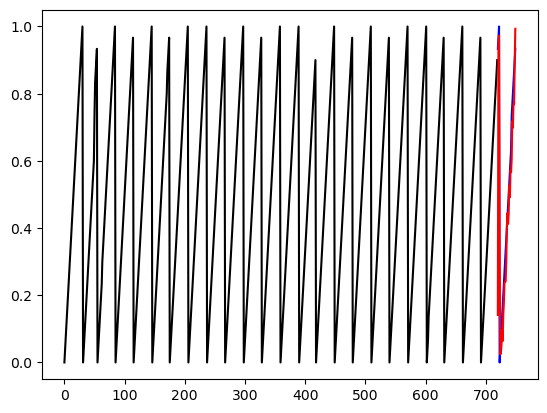

In [8]:
for i in range(8):
    st.output_and_show(network_controller.t,train_dataset[0][0],train_dataset[0][2],device_id,i)

R^2 tensor(-0.7109)
MSE: 0.017722938


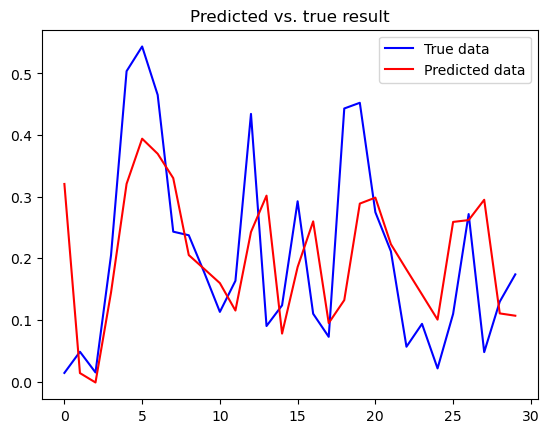

R^2 tensor(-4.2915)
MSE: 0.016621573


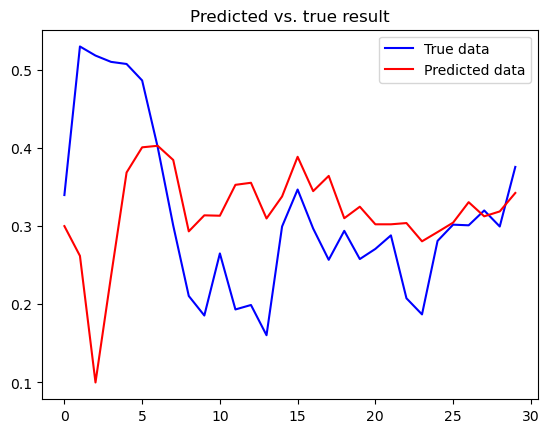

R^2 tensor(-1.0731)
MSE: 0.026430257


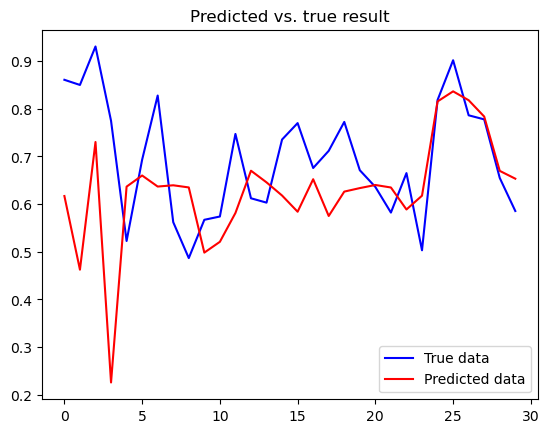

R^2 tensor(-0.1118)
MSE: 0.03503763


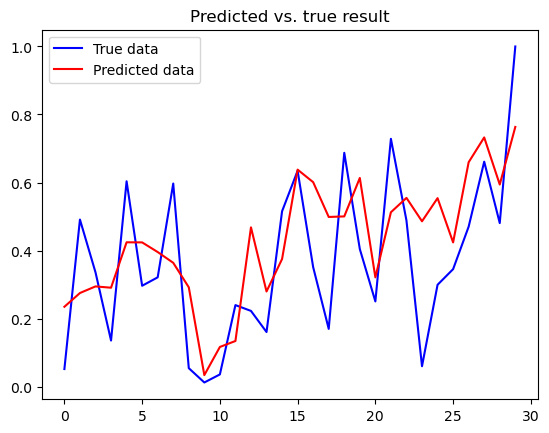

R^2 tensor(-1.1676)
MSE: 0.00022657178


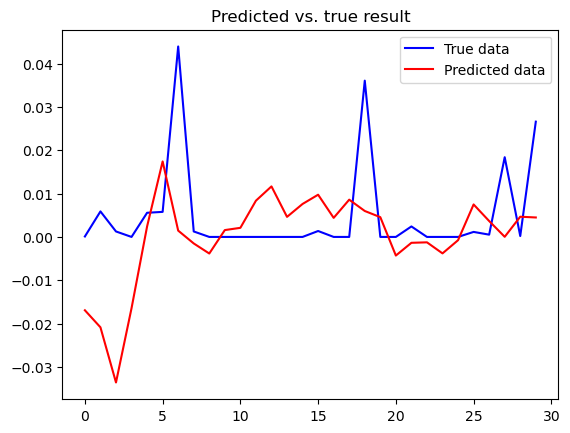

R^2 tensor(-39.0592)
MSE: 0.023102878


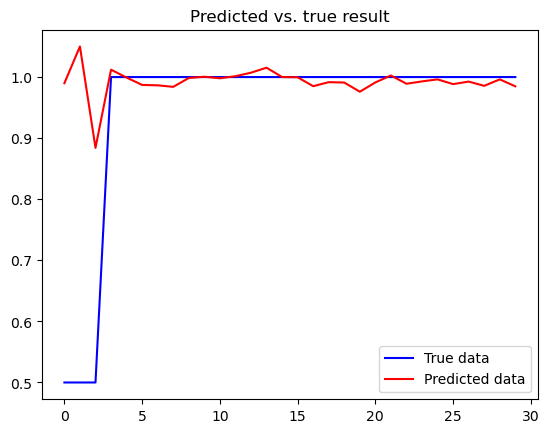

R^2 tensor(-3.9085)
MSE: 0.07954583


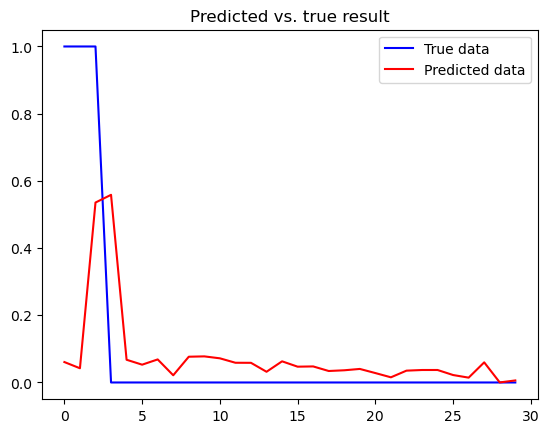

R^2 tensor(0.2167)
MSE: 0.05111246


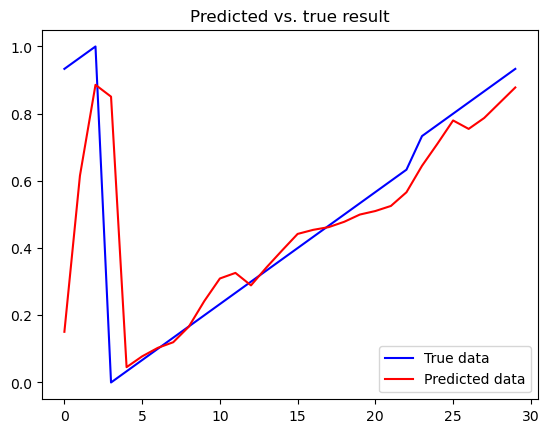

In [10]:
for i in range(8):
    st.output_and_show_only_prediction(network_controller.t,train_dataset[0][0],train_dataset[0][2],device_id,i)